# DATA 512 - A2

___

## Toxicity analysis

Objective: Understand worker's demographics and characteristics and to look
for possible under or over representative groups, which may lead to bias in 
labeling behavior, and subsequently, to any model trained on this data.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data shaping

Loading the datasets.

In [2]:
comments = pd.read_csv("./toxicity_datasets/toxicity_annotated_comments.tsv", sep="\t")
annotations = pd.read_csv("./toxicity_datasets/toxicity_annotations.tsv", sep="\t")
workers = pd.read_csv("./toxicity_datasets/toxicity_worker_demographics.tsv", sep="\t")

Combining the datasets. For this, first we are merging with a left join
comments and annotations, and then merging that with worker's data.

In [3]:
comments_annotated = pd.merge(comments, annotations, how="left", on="rev_id")
comm_ann_worker = pd.merge(comments_annotated, workers, how="left", on="worker_id")

### Worker demographics
The idea of this section is to observe the general distribution of the
worker's demographic data. This means that we are analyzing gender, age,
language, and education level. The objective of this is to compare these
values with external data, and see if they are similar or not.

The data shows that **65%** of the workers self-identify as male. This is not
consistent with the general population (in the US, the percentage is 
**49%**\*). This may lead to biased results if male workers labeling behavior
is different from women's behavior (this is analyzed later).  
It is also relevant to notice that there are really few workers who selected
the category "other". This may cause an underdetection of toxic comments
directed to minorities.  

\* Data from [2010 census](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf).

Procedure: Grouping by gender and counting repetitions.

[]

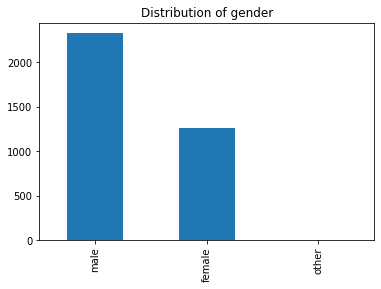

In [4]:
workers.gender.value_counts().plot.bar()
plt.title("Distribution of gender")
plt.plot()

The data shows that **81%** of the workers are not native English speakers.
This may difficult the analysis and conclusions drawn from the data, as it
is possible that these workers may miss subtle nuances in the labeled 
comments.

Procedure: Grouping by variable "English is first language" and counting
repetitions.

[]

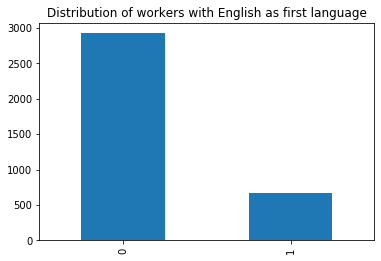

In [5]:
workers.english_first_language.value_counts().plot.bar()
plt.title("Distribution of workers with English as first language")
plt.plot()

The age distribution data shows a marked presence of younger workers. In fact,
workers with ages from 18 to 30 represent the **51%** of the total.  
When comparing these values to global distributions of Internet users, we see
that some groups are correctly represented and other are under or over
represented. For example, users with over 60 years represent a **0.8%**, but
online they represent around **7%**\*. Differences like this one may yield to
inaccurate models, as people's language tend to change from generation to
generation.

\* Data from [Statista](https://www.statista.com/statistics/272365/age-distribution-of-internet-users-worldwide/).

Procedure: Grouping by age group and counting repetitions.

[]

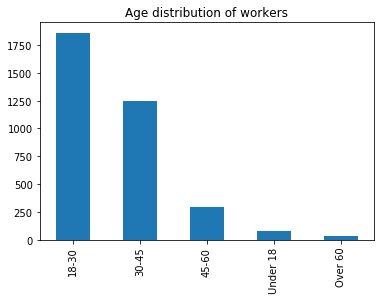

In [6]:
workers.age_group.value_counts().plot.bar()
plt.title("Age distribution of workers")
plt.plot()

The data shows a disproportionated amount of workers with higher education
(**99%**), when compared to the general population. In reality, these numbers
are much lower (**45%**-**46%**\*). This may also generate bias in the data as
the type of toxic comments detected by people with higher levels of education
may be different.

\* Data from [Wikipedia](https://en.wikipedia.org/wiki/Educational_attainment_in_the_United_States).

Procedure: Grouping by education level and counting repetitions.

[]

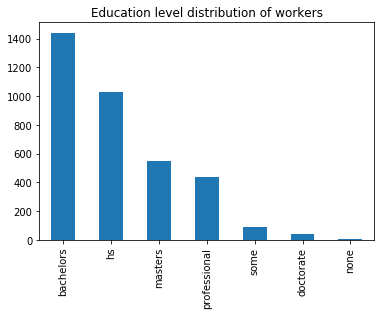

In [7]:
workers.education.value_counts().plot.bar()
plt.title("Education level distribution of workers")
plt.plot()

This analysis is relevant before using the dataset to train a model as a possible consequence of having a non-representative pool of workers may lead to a non-representative labeling behavior.

### Relationships between worker demographics and labeling behavior

The objective of this section is to analyze possible relationships between
worker's characteristics and labeling behavior. This can help us identify
potential sources of bias.

The data shows us that workers self-identified as males, tend to label
comments as toxic less often than females.

Procedure: Grouping by gender and calculating the mean value of toxicity.

[]

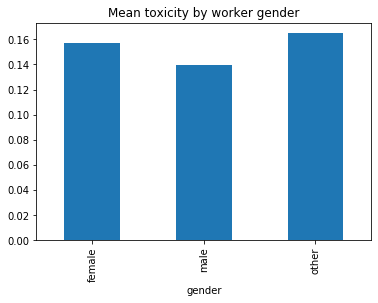

In [8]:
comm_ann_worker.groupby("gender").toxicity.mean().plot.bar()
plt.title("Mean toxicity by worker gender")
plt.plot()

This data also shows us that, for example, workers with holding a PhD also
tend to label comments as toxic less often. Conversely, workers with bachelors
degrees labeled comments as toxic more often. Conclusions from this have to be
carefully analyzed as there may be other confounding factors (like age, for
example).

Procedure: Grouping by education and calculating the mean value of toxicity.

[]

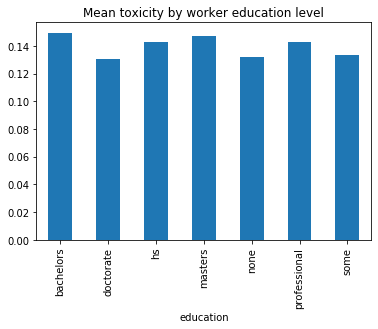

In [9]:
comm_ann_worker.groupby("education").toxicity.mean().plot.bar()
plt.title("Mean toxicity by worker education level")
plt.plot()

The graph shows that younger workers tend to label comments as toxic less
often.

Procedure: Grouping by age group calculating the mean value of toxicity.

[]

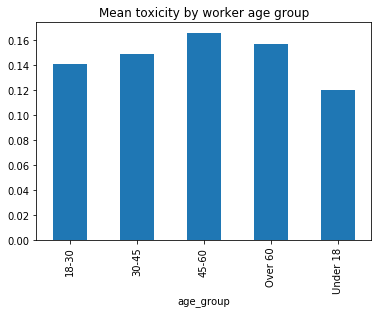

In [10]:
comm_ann_worker.groupby("age_group").toxicity.mean().plot.bar()
plt.title("Mean toxicity by worker age group")
plt.plot()

A potential consequence of this situation is that if a model is trained on
this data, it may carry the biases that the workers already had.

___

## Aggression analysis

Objective: Understand worker's characteristics and to look for possible sources
of bias in labeling behavior. This is extremely important if this data is used
to train a model, because these biases may be transfered to it.

### Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from patsy import dmatrices
import statsmodels.api as sm

In [12]:
comments = pd.read_csv("./agression_datasets/aggression_annotated_comments.tsv", sep="\t")
annotations = pd.read_csv("./agression_datasets/aggression_annotations.tsv", sep="\t")
workers = pd.read_csv("./agression_datasets/aggression_worker_demographics.tsv", sep="\t")

Combining the datasets. For this, first we are merging with a left join
comments and annotations, and then merging that with worker's data.

In [13]:
comments_annotated = pd.merge(comments, annotations, how="left", on="rev_id")
comm_ann_worker = pd.merge(comments_annotated, workers, how="left", on="worker_id")

### Workers characteristics and their impact on labeling

The data shows that workers who self-identify as male tend to label comments
as aggressive less often than those who self-identify las female
(**17%** vs **19%**).

Procedure: Grouping by gender and calculating the mean value of aggression.

[]

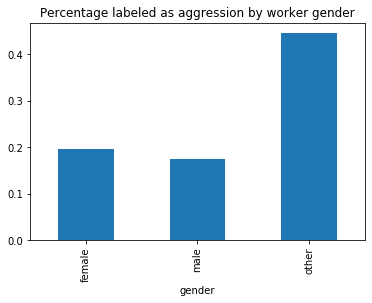

In [14]:
comm_ann_worker.groupby("gender").aggression.mean().plot.bar()
plt.title("Percentage labeled as aggression by worker gender")
plt.plot()

The data shows that workers with PhDs tend to label comments as aggressive
more often than other workers.

Procedure: Grouping by education and calculating the mean value of aggression.

[]

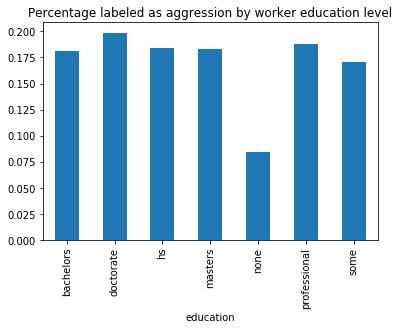

In [15]:
comm_ann_worker.groupby("education").aggression.mean().plot.bar()
plt.title("Percentage labeled as aggression by worker education level")
plt.plot()

The graph shows that younger workers tend to label comments as 
aggressive less often.

Procedure: Grouping by age group calculating the mean value of aggression.

[]

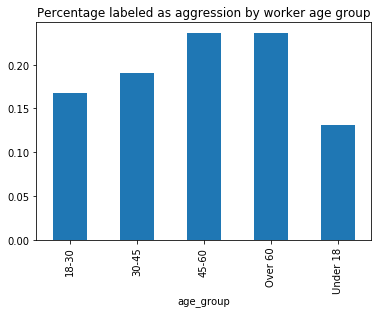

In [16]:
comm_ann_worker.groupby("age_group").aggression.mean().plot.bar()
plt.title("Percentage labeled as aggression by worker age group")
plt.plot()

To see if the differences shown are statistically significant we ran a
Logistic Regression including all the variables. The data shows that most of
the categories for each variable are statistically significant ($\alpha=5\%$) (the only
exceptions are categories for PhDs, masters and "none" education). 

A potential cause for this, is that people with different backgrounds, that
pertain to different generations, or that self-identify with some gender, have
(possibly on average) different life experiences and view language and human
relationships in different ways. This directly impacts on how they perceive
aggressiveness.  
A consequence of this is that if the pool of workers is not representative of
the general population, the labeling behavior is (possibly) also not 
representative of that population.

Procedure: Generate matrix versions of the dataset, use statsmodels to load
the Logistic Regression model, and finally, obtain a summary.

In [17]:
y, X = dmatrices('aggression ~ gender + english_first_language + age_group + education', comm_ann_worker, return_type = 'dataframe')

logit = sm.Logit(y, X)
res = logit.fit()

res.summary()

Optimization terminated successfully.
         Current function value: 0.475030
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             aggression   No. Observations:               843507
Model:                          Logit   Df Residuals:                   843493
Method:                           MLE   Df Model:                           13
Date:                Thu, 22 Oct 2020   Pseudo R-squ.:                0.004153
Time:                        02:31:27   Log-Likelihood:            -4.0069e+05
converged:                       True   LL-Null:                   -4.0236e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.5534      0.006   -240.524      0.000      -1.566      -1.541
gender[T.male]               -0.1171      0.006    -19.986      0.000      -0.129      -0.106
gender[T.other]               1.3357      0.221      6.046      0.000       0.903       1.769
age_group[T.30-45]            0.1502      0.006     24.711      0.000       0.138       0.162
age_group[T.45-60]            0.3990      0.010     41.619      0.000       0.380       0.418
age_group[T.Over 60]          0.3953      0.027     14.566      0.000       0.342       0.449
age_group[T.Under 18]        -0.2838      0.031     -9.191      0.000      -0.344      -0.223
education[T.doctorate]        0.0474      0.029      1.623      0.105      -0.010       0.105
education[T.hs]               0.0145      0.007      2.072      0.038       0.001       0.028
education[T.masters]         -0.0032      0.008     -0.399      0.690      -0.019       0.013
education[T.none]            -0.7160      0.369     -1.938      0.053      -1.440       0.008
education[T.professional]     0.0478      0.010      4.976      0.000       0.029       0.067
education[T.some]            -0.0862      0.021     -4.051      0.000      -0.128      -0.044
english_first_language        0.1557      0.008     19.325      0.000       0.140       0.171
=============================================================================================
"""

___

## Further implications

1. Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?  
>*I would expect that a model trained on the Wikipedia Talk corpus should perform well in the WikiDetox demo (or at least it should perform better than the other demos). The reason behind that is that the model was already trained in data similar to what it is supposed to see in the future. This means that aspects like: the context of the comments, the types of users, the vocabulary used, etc, should be the extremely similar. This always plays in favor of prediction models as it is (normally) very difficult to extrapolate knowledge from one context to another.*


2. Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?
>*I would expect that the demo **Behave!** would perform poorly, because it claims to work on widely different sites (it mentions YouTube, Reddit and many other forums). Since the language (and also the "type of aggressiveness/toxicity") used in different sites normally changes, it would be really difficult for a model to perform well in all those contexts.*


3. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 
>*I think it would be hard for the Perspective API to detect sarcastic comments, as in order to understand the true meaning of these types of comments, we need an extremely deep understanding of how language works and the context of a conversation.  
Another type of comment that would be difficult to detect would be phrases that include newly-created derogatory terms (which the model never saw in training) or terms that have a dual-meaning (a "normal" meaning and a "hostile" meaning).*